In [1]:
%matplotlib inline

In [2]:
import rasterio as rio
import rasterio.plot
import rasterio.mask
import geopandas as gpds
import fiona
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pds
from osgeo import gdal
import rasterio
from pathlib import Path
import geopandas as gpd
import pandas as pds
pds.set_option('display.max_rows', 200)

In [3]:
# Load glacier polygons
path = Path(r"/home/xhordurbhe/Verkefni/lamah_ice/data/final_shapefiles/glaciers_in_catchments.shp")
gdf = gpd.read_file(path)
gdf = gdf.set_index('id')

# First we process the Langjökull SMB maps

In [5]:
# Change the nodata values of the rasters
# for year in range(1997,2023): 
#     # Read glacier SMB .tif files
#     summer = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Langjökull_bs_%s_EPSG_3057_100m.tif' % year)
#     winter = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Langjökull_bw_%s_EPSG_3057_100m.tif' % year)
    
#     # We update the files in-place:
#     with rasterio.open(summer, "r+") as dataset:
#         dataset.nodata = np.nan
#     with rasterio.open(winter, "r+") as dataset:
#         dataset.nodata = np.nan

year = []
winter = []
summer = []
summer_year_dict = dict()
winter_year_dict = dict()
# Loop over all years:
for year in range(1997,2023): #,2023):
    # Read glacier SMB .tif files
    summer = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Langjökull_bs_%s_EPSG_3057_100m.tif' % year)
    winter = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Langjökull_bw_%s_EPSG_3057_100m.tif' % year)
    src_s = rio.open(summer)
    src_w = rio.open(winter)
    
    index = []
    winter = []
    summer = []
    
    for idx in gdf.index:
        # Clip Langjökull raster with the watershed shapefile
        try:
            out_summer, out_transform = rasterio.mask.mask(src_s, gdf.loc[idx], crop=True)
            out_summer = np.where(out_summer > 100, np.nan, out_summer)  # Replace values greater than 100 with np.nan
            out_s_meta = src_s.meta
            
            out_winter, out_transform = rasterio.mask.mask(src_w, gdf.loc[idx], crop=True)
            out_winter = np.where(out_winter > 100, np.nan, out_winter)  # Replace values greater than 100 with np.nan
            out_w_meta = src_w.meta
        
            # Calculate attributes for the clipped rasters
            summer_mean = np.nanmean(out_summer[0])
            winter_mean = np.nanmean(out_winter[0])
            
            index.append(idx)
            winter.append(winter_mean)
            summer.append(summer_mean)
        except:
            continue #print('Watershed no. %s does not overlap raster' %idx)

    df_w = pds.DataFrame(winter,index=index)
    df_s = pds.DataFrame(summer,index=index)
    
    summer_year_dict[year] = df_s
    winter_year_dict[year] = df_w
    
# Concatenate the single-year dataframes:    
concatted_s_lang = pds.concat(summer_year_dict,axis=1)
concatted_s_lang.columns = [i[0] for i in concatted_s_lang.columns]

concatted_w_lang = pds.concat(winter_year_dict,axis=1)
concatted_w_lang.columns = [i[0] for i in concatted_w_lang.columns]

# Drop the watershed for Sogið (all nans - doesn't seem to overlap with the SMB raster) and Blanda (the majority of the glacial watershed is in Hofsjökull)
concatted_w_lang = concatted_w_lang.drop([79,6,7]) 
concatted_s_lang = concatted_s_lang.drop([79,6,7]) 

/tmp/ipykernel_232432/3604742418.py:42: RuntimeWarning: Mean of empty slice
  summer_mean = np.nanmean(out_summer[0])
/tmp/ipykernel_232432/3604742418.py:43: RuntimeWarning: Mean of empty slice
  winter_mean = np.nanmean(out_winter[0])
/tmp/ipykernel_232432/3604742418.py:42: RuntimeWarning: Mean of empty slice
  summer_mean = np.nanmean(out_summer[0])
/tmp/ipykernel_232432/3604742418.py:43: RuntimeWarning: Mean of empty slice
  winter_mean = np.nanmean(out_winter[0])
/tmp/ipykernel_232432/3604742418.py:42: RuntimeWarning: Mean of empty slice
  summer_mean = np.nanmean(out_summer[0])
/tmp/ipykernel_232432/3604742418.py:43: RuntimeWarning: Mean of empty slice
  winter_mean = np.nanmean(out_winter[0])
/tmp/ipykernel_232432/3604742418.py:42: RuntimeWarning: Mean of empty slice
  summer_mean = np.nanmean(out_summer[0])
/tmp/ipykernel_232432/3604742418.py:43: RuntimeWarning: Mean of empty slice
  winter_mean = np.nanmean(out_winter[0])
/tmp/ipykernel_232432/3604742418.py:42: RuntimeWarning: 

# Now we process the SMB maps from Vatnajökull

In [10]:
# # # Change the nodata values of the rasters
# # for year in range(1997,2023): 
# #     # Read glacier SMB .tif files
# #     summer = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Vatnajökull_bs_%s_EPSG_3057_100m.tif' % year)
# #     winter = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Vatnajökull_bw_%s_EPSG_3057_100m.tif' % year)
    
# #     # We update the files in-place:
# #     with rasterio.open(summer, "r+") as dataset:
# #         dataset.nodata = np.nan
# #     with rasterio.open(winter, "r+") as dataset:
# #         dataset.nodata = np.nan

year = []
winter = []
summer = []
summer_year_dict = dict()
winter_year_dict = dict()
# Loop over all years:
for year in range(1997,2023): #,2023):
    # Read glacier SMB .tif files
    summer = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Vatnajökull_bs_%s_EPSG_3057_100m.tif' % year)
    winter = Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/Vatnajökull_bw_%s_EPSG_3057_100m.tif' % year)
    src_s = rio.open(summer)
    src_w = rio.open(winter)
    
    index = []
    winter = []
    summer = []
    
    for idx in gdf.index:
        # Clip Vatnajökull raster with the watershed shapefile
        try:
            out_summer, out_transform = rasterio.mask.mask(src_s, gdf.loc[idx], crop=True)
            out_summer = np.where(out_summer > 100, np.nan, out_summer)  # Replace values greater than 100 with np.nan
            out_s_meta = src_s.meta
            
            out_winter, out_transform = rasterio.mask.mask(src_w, gdf.loc[idx], crop=True)
            out_winter = np.where(out_winter > 100, np.nan, out_winter)  # Replace values greater than 100 with np.nan
            out_w_meta = src_w.meta
        
            # Calculate attributes for the clipped rasters
            summer_mean = np.nanmean(out_summer[0])
            winter_mean = np.nanmean(out_winter[0])
            
            index.append(idx)
            winter.append(winter_mean)
            summer.append(summer_mean)
        except:
            continue #print('Watershed no. %s does not overlap raster' %idx)

    df_w = pds.DataFrame(winter,index=index)
    df_s = pds.DataFrame(summer,index=index)
    
    summer_year_dict[year] = df_s
    winter_year_dict[year] = df_w
    
# Concatenate the single-year dataframes:    
concatted_s_vatna = pds.concat(summer_year_dict,axis=1)
concatted_s_vatna.columns = [i[0] for i in concatted_s_vatna.columns]

concatted_w_vatna = pds.concat(winter_year_dict,axis=1)
concatted_w_vatna.columns = [i[0] for i in concatted_w_vatna.columns]

# Drop the watershed for Hrafnkela (33), Stóraversskurður (81), Þjórsá (100,101,102,103,104,105,1040) (all nans - doesn't seem to overlap with the SMB raster)
concatted_w_vatna = concatted_w_vatna.drop([33,81,99,100,101,102,103,104,990]) 
concatted_s_vatna = concatted_s_vatna.drop([33,81,99,100,101,102,103,104,990]) 

# Combine the _w and _s dataframes for Langjökull and Vatnajökull

In [11]:
w_combined = pds.concat([concatted_w_vatna,concatted_w_lang])
w_combined = w_combined.sort_index() 
w_combined = w_combined.transpose()

s_combined = pds.concat([concatted_s_vatna, concatted_s_lang])
s_combined = s_combined.sort_index() 
s_combined = s_combined.transpose()

In [12]:
# Save the .csv files
w_combined.to_csv(Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/GMB_on_watersheds/GMB_winter.csv'))
s_combined.to_csv(Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/GMB_on_watersheds/GMB_summer.csv'))
(s_combined+w_combined).to_csv(Path(r'/home/xhordurbhe/Verkefni/lamah_ice/data/GMB/GMB_on_watersheds/GMB_annual_net.csv'))

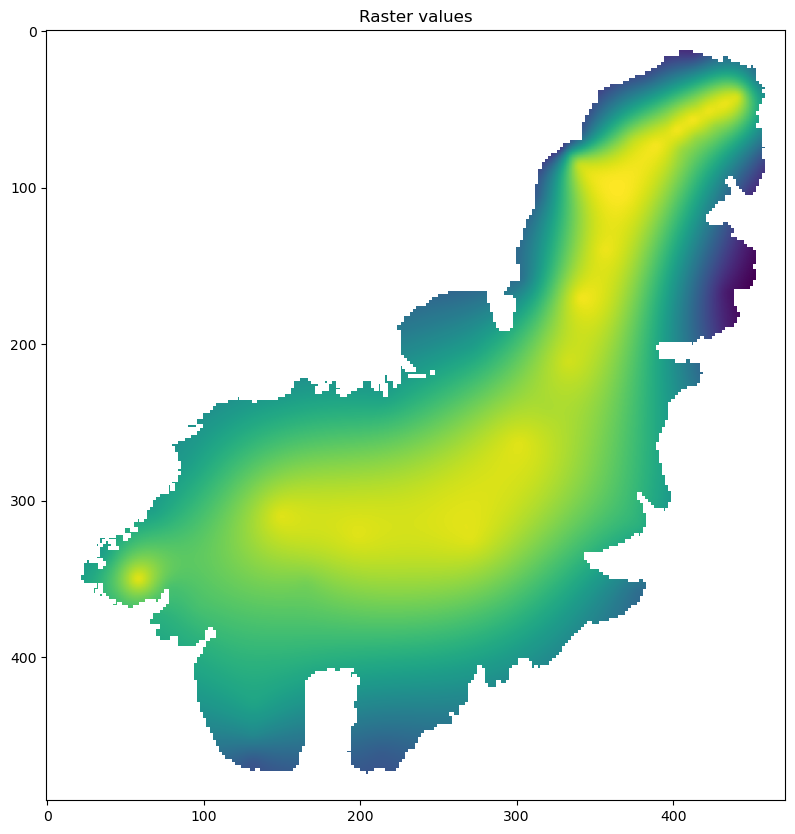

In [53]:
# Plot the Langjökull raster as an image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(raster_array, cmap='viridis')
ax.set_title('Raster values')

# Show the plot
plt.show()

<AxesSubplot: >

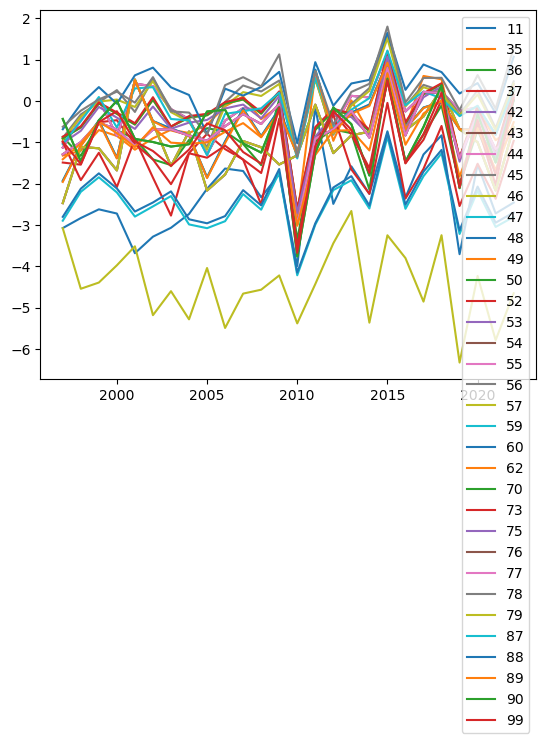

In [142]:
# Visualize the annual SMB 
(s_combined+w_combined).plot()

<AxesSubplot: >

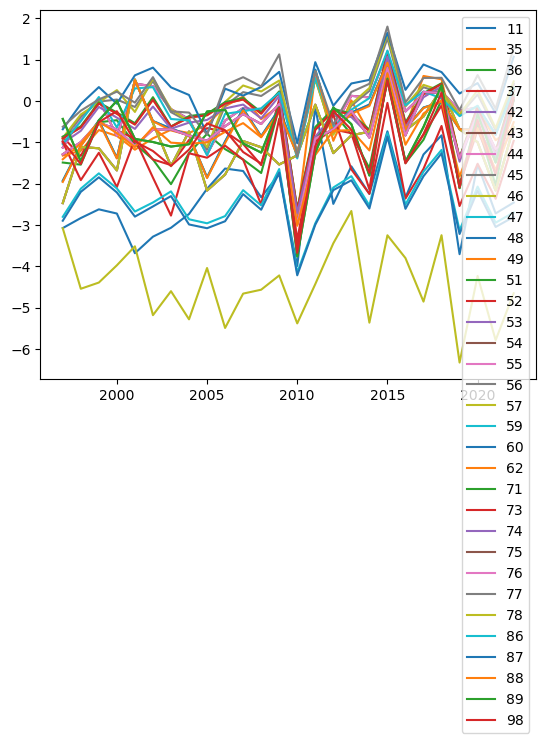

In [13]:
# Visualize the annual SMB 
(s_combined+w_combined).plot()